# ISLR Chapter 5 - Resampling Methods

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

from sklearn.datasets import load_boston

## Exercise 5

In [2]:
df = pd.read_csv('Default.csv',index_col = False)

print(len(df))
df.head()

10000


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### a


In [3]:
X = df[["balance", "income"]]
y = df["default"]
clf = LogisticRegression()
clf.fit(X, y)
clf.coef_

array([[5.64710797e-03, 2.08091984e-05]])


### b




#### i



In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"],test_size = 0.3, random_state = 42)


#### ii



In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()


#### iii



In [6]:
glmpred = clf.predict(X_test)

In [7]:
conf_mat = confusion_matrix(y_test, glmpred)
conf_mat

array([[2905,    1],
       [  94,    0]], dtype=int64)

In [8]:
round((conf_mat[0][1] + conf_mat[1][0]) / y_train.shape[0], 4)
###accu

0.0136


#### iv



In [9]:
#validation set error
1 - clf.score(X_test, y_test)

0.03166666666666662


### c



In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"],test_size = 0.3, random_state = 420)
clf = LogisticRegression()
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

0.02833333333333332

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"],test_size = 0.3, random_state = 910)
clf = LogisticRegression()
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

0.03600000000000003

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"],test_size = 0.3, random_state = 652)
clf = LogisticRegression()
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

0.029000000000000026


### d



In [13]:
np.random.seed(42)
with_student = {}
without_student = {}

#სტუდენტის ცვალით და მის გარეშე
categorical_features = ["student"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["income", "balance"]
with_student_preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),("num", "passthrough", numerical_features)])
with_student_clf = Pipeline([("preprocessor", with_student_preprocessor), ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])
without_student_preprocessor = ColumnTransformer([("num", "passthrough", numerical_features)])
without_student_clf = Pipeline([("preprocessor", without_student_preprocessor), ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])

# ციკლში გავუშვი,რომ საშუალო გადახრა მეპოვა
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(df, df["default"], test_size = 0.25)
    with_student_clf.fit(X_train, y_train)
    
    with_student[i] = 1 - with_student_clf.score(X_test, y_test)
    
    without_student_clf.fit(X_train, y_train)
    
    without_student[i] = 1 - without_student_clf.score(X_test, y_test)
    
errors = pd.DataFrame({"with_student": with_student, "without_student": without_student})
errors["difference"] = errors["with_student"] - errors["without_student"]
errors["difference"].mean()

0.0027279999999999995

In [14]:
### სტუდენტის ცვლადმა ცდომილება გაზარდა

## Exercise 6

In [15]:
endog = (df["default"] == "Yes").astype(int)
exog = sm.add_constant(df[["income", "balance"]],1)
mod = sm.Logit(endog, exog)
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### a


In [16]:
###estimated standard error

In [17]:
res.bse["income"]

4.985245461753051e-06

In [18]:
res.bse["balance"]

0.0002273813847684474


### b



In [19]:
def boot_fn(data, clf):
    clf.fit(data[["income", "balance"]], data["default"])
    return clf.coef_


### c



In [20]:
# np.random.seed(17)
# num_estimates = 10000
# boot_estimates = np.empty((num_estimates, 2))
# for i in range(num_estimates):
#     clf = LogisticRegression()
#     sample = resample(df)
#     coefs = boot_fn(sample, clf)
#     boot_estimates[i, 0] = coefs[0, 0]
#     boot_estimates[i, 1] = coefs[0, 1]

In [21]:
# boot_df = pd.DataFrame(boot_estimates, columns = ["income", "balance"])

In [22]:
# boot_df["income"].std()


In [23]:
# boot_df["balance"].std()



### d



## Exercise 7

In [24]:
weekly_filepath = "Weekly.csv"
weekly = pd.read_csv(weekly_filepath)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### a


In [25]:
X = weekly[["Lag1", "Lag2"]]
y = weekly["Direction"]
clf = LogisticRegression()
clf.fit(X, y)
clf.coef_, clf.intercept_

(array([[-0.03869814,  0.06020749]]), array([0.22122502]))


### b



In [26]:
X_loo = weekly.loc[weekly.index != 0, ["Lag1", "Lag2"]]
y_loo = weekly.loc[weekly.index != 0, "Direction"]
clf = LogisticRegression()
clf = clf.fit(X_loo, y_loo)
clf.coef_, clf.intercept_

(array([[-0.03840931,  0.06080633]]), array([0.22324404]))


### c



In [27]:
clf.predict_proba(weekly.loc[0, ["Lag1", "Lag2"]].to_frame().T)

array([[0.42861856, 0.57138144]])

In [28]:
clf.predict(weekly.loc[0, ["Lag1", "Lag2"]].to_frame().T)

array(['Up'], dtype=object)

In [29]:
weekly.iloc[0]

Year             1990
Lag1            0.816
Lag2            1.572
Lag3           -3.936
Lag4           -0.229
Lag5           -3.484
Volume       0.154976
Today           -0.27
Direction        Down
Name: 0, dtype: object

In [30]:
###თურმე არასწორი ყოფილა  (0,429 იყო down და 0,571 კი up მაგრამ თურმე down არის)


### d



In [31]:
n = weekly.shape[0]
scores = np.empty(n)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
for i in range(n):
    X_loo = weekly.loc[weekly.index != i, ["Lag1", "Lag2"]]
    y_loo = weekly.loc[weekly.index != i, "Direction"]
    clf.fit(X_loo, y_loo)
    scores[i] = clf.score(weekly.loc[i, ["Lag1", "Lag2"]].to_frame().T, pd.Series(weekly.loc[i, "Direction"]))


#### i




#### ii




#### iii




#### iv




### e



In [32]:
scores.mean()

0.5500459136822773

In [33]:
errors = 1 - scores
errors.mean()

0.44995408631772266

In [34]:
#LOOCV
X = weekly[["Lag1", "Lag2"]]
y = weekly["Direction"]
clf = LogisticRegression()
loo = LeaveOneOut()
cv_scores = cross_val_score(clf, X, y, cv = loo)
cv_scores.mean()

0.5500459136822773

In [35]:
1 - cv_scores.mean()

0.4499540863177227

## Exercise 8

### a


In [36]:
np.random.seed(42)
x = np.random.normal(size = 100)
y = x - 2*x**2 + np.random.normal(size = 100)


### b



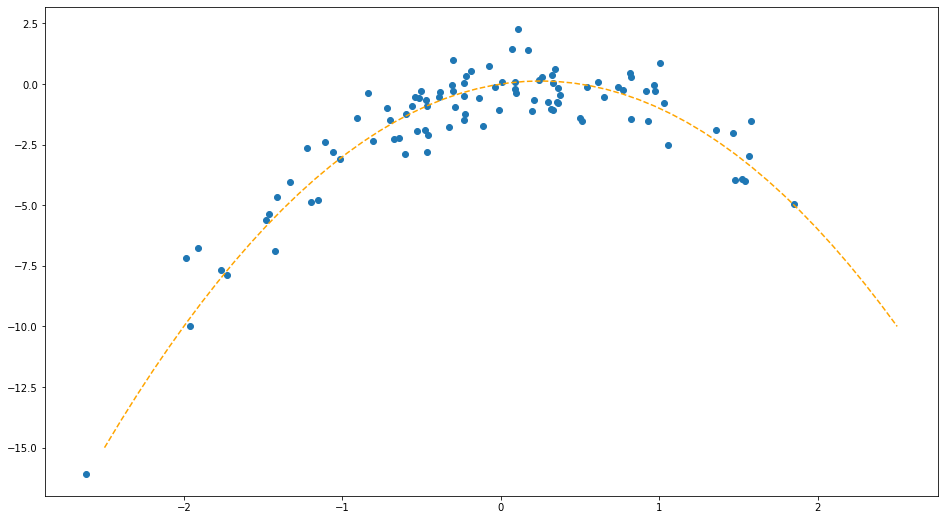

In [37]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.scatter(x, y)

x_range = np.linspace(start = -2.5, stop = 2.5)
parabola = x_range - 2*x_range**2
ax.plot(x_range, parabola, color = "orange", linestyle = "--");


### c



In [38]:
np.random.seed(312)
loocv_scores = pd.Series()
for i in range(1, 5):
    poly_reg = Pipeline([("poly", PolynomialFeatures(degree = i)), ("reg", LinearRegression())])
    loo = LeaveOneOut()
    cv_scores = cross_val_score(poly_reg, x.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = loo)
    loocv_scores.loc[i] = abs(cv_scores.mean())
loocv_scores
# წრფივი
# კვადრატული
# კუბური

C:\Users\nikan\AppData\Local\Temp/ipykernel_5252/2074887066.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  loocv_scores = pd.Series()


1    5.302957
2    0.912764
3    0.956957
4    0.972772
dtype: float64


### d



In [39]:
np.random.seed(42)
loocv_scores = pd.Series()
for i in range(1, 5):
    poly_reg = Pipeline([("poly", PolynomialFeatures(degree = i)), ("reg", LinearRegression())])
    loo = LeaveOneOut()
    cv_scores = cross_val_score(poly_reg, x.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = loo)
    loocv_scores.loc[i] = abs(cv_scores.mean())
loocv_scores

C:\Users\nikan\AppData\Local\Temp/ipykernel_5252/4124702694.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  loocv_scores = pd.Series()


1    5.302957
2    0.912764
3    0.956957
4    0.972772
dtype: float64


### e




### f



## Exercise 9

In [40]:
boston = pd.read_csv("Boston.csv", index_col = "Unnamed: 0")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### a


In [41]:
boston["medv"].mean()

22.532806324110698


### b



In [42]:
#estimat standard error
sample_sd = boston["medv"].std()
sample_sd / boston.shape[0]**0.5
#or
boston["medv"].sem()

0.4088611474975351


### c



In [43]:
np.random.seed(42)
n_bootstraps = 10000
means = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(boston["medv"])
    means[i] = sample.mean()
print("Bootstrap estimate of mean: ", means.mean())
print("Bootstrap estimate of std. error: ", means.std(ddof = 1))

Bootstrap estimate of mean:  22.535756719367594
Bootstrap estimate of std. error:  0.405167335688298



### d




### e



In [44]:
boston["medv"].median()

21.2


### f



In [45]:
np.random.seed(42)
n_bootstraps = 10000
medians = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(boston["medv"])
    medians[i] = sample.median()
print("Bootstrap estimate of median: ", medians.mean())
print("Bootstrap estimate of std. error: ", medians.std(ddof = 1))

Bootstrap estimate of median:  21.18772
Bootstrap estimate of std. error:  0.37699922339634057



### g


In [46]:
boston["medv"].quantile(0.1)

12.75


### h


In [47]:
np.random.seed(42)
n_bootstraps = 10000
tenth_percs = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(boston["medv"])
    tenth_percs[i] = sample.quantile(0.1)
print("Bootstrap estimate of tenth percentile: ", tenth_percs.mean())
print("Bootstrap estimate of std. error: ", tenth_percs.std(ddof = 1))

Bootstrap estimate of tenth percentile:  12.763160000000001
Bootstrap estimate of std. error:  0.5005490678614172
